In [2]:
import tensorflow as tf

tf.__version__

'2.3.0'

In [3]:
import os
from tensorflow.python.client import device_lib
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "99"
 
if __name__ == "__main__":
    print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16296813508483532912
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 912572991388227015
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1316644046
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5196633524112540700
physical_device_desc: "device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:2b:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9657738650577821723
physical_device_desc: "device: XLA_GPU device"
]


In [4]:
import numpy  
import tensorflow as tf  
tf.compat.v1.disable_eager_execution()
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')  
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')  
c = tf.matmul(a, b)  
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))  
print(sess.run(c))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:2b:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

[[22. 28.]
 [49. 64.]]


tensorflow2以上版本，所以加上两个compat.v1.<p>
加tf.compat.v1.disable_eager_execution()

In [5]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat

In [6]:
vision=loadmat('D:\\A LOVE GIRL\\0.代码T-SNE\\付师兄t-sne\\FEATURES.mat')

In [12]:
Y_train = vision['Z_m']  #Z_m
Y_test = vision['Z_lsgm']   #Z_lsgm
# X_train = vision['stimTra']  
# X_test = vision['stimTes']
LABEL = vision['LABEL']

# digits = load_digits()
# print(digits.data.shape)
# print(LABEL.shape)

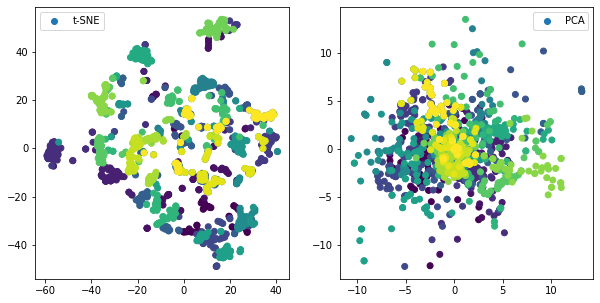

In [13]:
# vision=loadmat('C:\\Users\\PCF\\Desktop\\IDVRM\\IDVRM\\data\\az\\matlab.mat')
# Y_train = vision['EEGTra']
# Y_test = vision['EEGTes']
# X_train = vision['stimTra']
# X_test = vision['stimTes']
# LABEL = vision['LABEL']

# digits = load_digits()
# print(digits.data.shape)
# print(LABEL.shape)
X_tsne = TSNE(n_components=2,random_state=33).fit_transform(Y_train)
X_pca = PCA(n_components=2).fit_transform(Y_train)

ckpt_dir="images"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=LABEL, label="t-SNE")
plt.legend()
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=LABEL, label="PCA")
plt.legend()
plt.savefig('images/digits_tsne-pca.png', dpi=120)
plt.show()